In [1]:
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

import mxnet as mx
import numpy as np
from mxnet import nd, autograd, gluon


# three customized modules
from labelshift import *
from utils4gluon import *
from data_shift import *
from data import *
from ls_correction import *
import pickle
np.random.seed(112358)

## Experiment 1 -- "Tweak One"

In [10]:
dataset_name = 'cifar10' # choices: 'mnist', 'cifar10'
num_labels = 10
results_dict = {}


# Tweak train data
tweak_train = True # options include 
p_P = [.1, .1, .1, .1 ,.1 ,.1, .1, .1, .1, .1]

# Tweak test data
tweak_test = True


counter = 0
for knockout_label in range(10):
    for p in np.arange(0,1.1, .1):
        
        counter += 1
        print("Experiment: ", counter, "p =", p, "knockout_label =", knockout_label)
        p_Q = np.full(num_labels, (1.-p)/(num_labels-1))
        p_Q[knockout_label] = p

        # sample data
        num_train_samples = 30000
        num_val_samples = 30000
        num_test_samples = 10000

        # NN config
        num_hidden = 256
        epochs = 10
        batch_size = 1024

        #########################################
        #  Invoke experiment code
        #########################################
        results = correction_experiment(dataset_name=dataset_name, tweak_train=tweak_train, 
                             p_P=p_P, tweak_test=tweak_test, p_Q=p_Q, 
                             num_train_samples=num_train_samples,
                             num_val_samples=num_val_samples,
                             num_test_samples=num_test_samples,
                             num_hidden=num_hidden, 
                             epochs=epochs,
                             batch_size=batch_size)

#         print(results)
        shortname = str(p) + "_" + str(knockout_label)
        results_dict[shortname] = results

with open("correction_results/tweak_one.pkl", "wb") as f:
    pickle.dump(results_dict, f)

Experiment:  1 p = 0.0 knockout_label = 0
Epoch 0. Loss: 1.89313018348, Train_acc 0.295909, Validation_acc 0.285681
Epoch 1. Loss: 1.73509538058, Train_acc 0.359841, Validation_acc 0.339719
Epoch 2. Loss: 1.63872890907, Train_acc 0.419576, Validation_acc 0.383062
Epoch 3. Loss: 1.56755313781, Train_acc 0.439366, Validation_acc 0.395856
Epoch 4. Loss: 1.50153278828, Train_acc 0.459255, Validation_acc 0.408782
Epoch 5. Loss: 1.44758081914, Train_acc 0.469083, Validation_acc 0.405983
Epoch 6. Loss: 1.39106800498, Train_acc 0.504298, Validation_acc 0.424374
Epoch 7. Loss: 1.34773381964, Train_acc 0.531883, Validation_acc 0.431337
Epoch 8. Loss: 1.29225723533, Train_acc 0.55034, Validation_acc 0.442031
Epoch 9. Loss: 1.23924133081, Train_acc 0.5619, Validation_acc 0.441664
[[ 0.01618016  0.        ]
 [ 1.04307547  1.12985719]
 [ 1.29313399  1.10143979]
 [ 0.99506482  1.11528239]
 [ 1.18548538  1.12016293]
 [ 1.08681322  1.16955941]
 [ 1.16812781  1.07794308]
 [ 0.90571586  1.0649652 ]
 [ 1.

Epoch 7. Loss: 1.23683558295, Train_acc 0.419576, Validation_acc 0.363839
Epoch 8. Loss: 1.19743098199, Train_acc 0.436367, Validation_acc 0.36927
Epoch 9. Loss: 1.15229198207, Train_acc 0.450626, Validation_acc 0.375333
Accuracy weighted 0.466602
Experiment:  5 p = 0.4 knockout_label = 0
Epoch 0. Loss: 1.89710085715, Train_acc 0.309168, Validation_acc 0.295942
Epoch 1. Loss: 1.73768193211, Train_acc 0.36907, Validation_acc 0.344783
Epoch 2. Loss: 1.64418368082, Train_acc 0.391058, Validation_acc 0.359575
Epoch 3. Loss: 1.56707673562, Train_acc 0.413779, Validation_acc 0.372735
Epoch 4. Loss: 1.49723627358, Train_acc 0.447395, Validation_acc 0.390292
Epoch 5. Loss: 1.43474754246, Train_acc 0.503365, Validation_acc 0.420143
Epoch 6. Loss: 1.38222919922, Train_acc 0.519756, Validation_acc 0.426239
Epoch 7. Loss: 1.32506288038, Train_acc 0.47468, Validation_acc 0.389925
Epoch 8. Loss: 1.28448815075, Train_acc 0.566398, Validation_acc 0.445629
Epoch 9. Loss: 1.2222539006, Train_acc 0.54101

Epoch 4. Loss: 0.831751187688, Train_acc 0.21935, Validation_acc 0.208489
Epoch 5. Loss: 0.793272205203, Train_acc 0.247535, Validation_acc 0.230577
Epoch 6. Loss: 0.772983430096, Train_acc 0.24387, Validation_acc 0.222715
Epoch 7. Loss: 0.765253990505, Train_acc 0.254964, Validation_acc 0.232343
Epoch 8. Loss: 0.725529839564, Train_acc 0.280184, Validation_acc 0.254331
Epoch 9. Loss: 0.722342209795, Train_acc 0.278218, Validation_acc 0.249334
Accuracy weighted 0.689062
Experiment:  9 p = 0.8 knockout_label = 0
Epoch 0. Loss: 1.90998695288, Train_acc 0.336687, Validation_acc 0.332056
Epoch 1. Loss: 1.76035881448, Train_acc 0.372268, Validation_acc 0.356477
Epoch 2. Loss: 1.6702190919, Train_acc 0.413213, Validation_acc 0.388026
Epoch 3. Loss: 1.59559429518, Train_acc 0.426772, Validation_acc 0.394423
Epoch 4. Loss: 1.52835003673, Train_acc 0.451926, Validation_acc 0.409382
Epoch 5. Loss: 1.47532189323, Train_acc 0.473148, Validation_acc 0.412913
Epoch 6. Loss: 1.41873864327, Train_acc 

Epoch 0. Loss: 1.80839786513, Train_acc 0.298308, Validation_acc 0.292044
Epoch 1. Loss: 1.65345411538, Train_acc 0.334955, Validation_acc 0.313866
Epoch 2. Loss: 1.56439773385, Train_acc 0.366071, Validation_acc 0.341918
Epoch 3. Loss: 1.49723506052, Train_acc 0.388293, Validation_acc 0.352479
Epoch 4. Loss: 1.44401358025, Train_acc 0.416711, Validation_acc 0.376899
Epoch 5. Loss: 1.38922810593, Train_acc 0.4369, Validation_acc 0.379731
Epoch 6. Loss: 1.33469797225, Train_acc 0.435035, Validation_acc 0.374134
Epoch 7. Loss: 1.29108286114, Train_acc 0.467351, Validation_acc 0.388726
Epoch 8. Loss: 1.24674419286, Train_acc 0.485474, Validation_acc 0.391191
Epoch 9. Loss: 1.20156062005, Train_acc 0.509895, Validation_acc 0.39982
Accuracy weighted 0.439453
Experiment:  13 p = 0.1 knockout_label = 1
Epoch 0. Loss: 1.88466796076, Train_acc 0.338353, Validation_acc 0.324927
Epoch 1. Loss: 1.73242985739, Train_acc 0.384328, Validation_acc 0.366471
Epoch 2. Loss: 1.64054042747, Train_acc 0.403

Epoch 0. Loss: 1.63134527994, Train_acc 0.207289, Validation_acc 0.202659
Epoch 1. Loss: 1.46396324571, Train_acc 0.255963, Validation_acc 0.250333
Epoch 2. Loss: 1.36144874271, Train_acc 0.326493, Validation_acc 0.308802
Epoch 3. Loss: 1.28817002555, Train_acc 0.346715, Validation_acc 0.320729
Epoch 4. Loss: 1.23412942979, Train_acc 0.355277, Validation_acc 0.327492
Epoch 5. Loss: 1.1863569465, Train_acc 0.418777, Validation_acc 0.3744
Epoch 6. Loss: 1.12842728661, Train_acc 0.414479, Validation_acc 0.36897
Epoch 7. Loss: 1.09019956832, Train_acc 0.348114, Validation_acc 0.306836
Epoch 8. Loss: 1.04841932053, Train_acc 0.452892, Validation_acc 0.383462
Epoch 9. Loss: 1.0226942243, Train_acc 0.438233, Validation_acc 0.369636
Accuracy weighted 0.550488
Experiment:  17 p = 0.5 knockout_label = 1
Epoch 0. Loss: 1.88878692701, Train_acc 0.309102, Validation_acc 0.298807
Epoch 1. Loss: 1.72625983378, Train_acc 0.368903, Validation_acc 0.342118
Epoch 2. Loss: 1.62352056214, Train_acc 0.40744

Epoch 0. Loss: 0.740041029974, Train_acc 0.104944, Validation_acc 0.101746
Epoch 1. Loss: 0.637707156707, Train_acc 0.165012, Validation_acc 0.161347
Epoch 2. Loss: 0.581824147237, Train_acc 0.206157, Validation_acc 0.197928
Epoch 3. Loss: 0.523685397481, Train_acc 0.248301, Validation_acc 0.232976
Epoch 4. Loss: 0.524402240101, Train_acc 0.254531, Validation_acc 0.238406
Epoch 5. Loss: 0.466118632281, Train_acc 0.252132, Validation_acc 0.23201
Epoch 6. Loss: 0.442750252101, Train_acc 0.297042, Validation_acc 0.273288
Epoch 7. Loss: 0.434832394272, Train_acc 0.311734, Validation_acc 0.281483
Epoch 8. Loss: 0.398717642523, Train_acc 0.305737, Validation_acc 0.271888
Epoch 9. Loss: 0.399725783873, Train_acc 0.339419, Validation_acc 0.298474
Accuracy weighted 0.705176
Experiment:  21 p = 0.9 knockout_label = 1
Epoch 0. Loss: 1.89287435209, Train_acc 0.326759, Validation_acc 0.317231
Epoch 1. Loss: 1.73531415384, Train_acc 0.385561, Validation_acc 0.364472
Epoch 2. Loss: 1.63569339156, Tra

Epoch 0. Loss: 1.86953110119, Train_acc 0.293877, Validation_acc 0.284748
Epoch 1. Loss: 1.71230081941, Train_acc 0.344583, Validation_acc 0.332756
Epoch 2. Loss: 1.60656564245, Train_acc 0.384029, Validation_acc 0.360441
Epoch 3. Loss: 1.53035207692, Train_acc 0.426006, Validation_acc 0.391724
Epoch 4. Loss: 1.45977310843, Train_acc 0.435868, Validation_acc 0.395056
Epoch 5. Loss: 1.3916969028, Train_acc 0.463086, Validation_acc 0.413579
Epoch 6. Loss: 1.33728592057, Train_acc 0.480577, Validation_acc 0.421375
Epoch 7. Loss: 1.28007827942, Train_acc 0.497735, Validation_acc 0.422142
Epoch 8. Loss: 1.22648816972, Train_acc 0.525753, Validation_acc 0.436501
Epoch 9. Loss: 1.18193439407, Train_acc 0.51789, Validation_acc 0.427072
Accuracy weighted 0.433398
Experiment:  25 p = 0.2 knockout_label = 2
Epoch 0. Loss: 1.89693747163, Train_acc 0.342351, Validation_acc 0.326193
Epoch 1. Loss: 1.74531714256, Train_acc 0.390192, Validation_acc 0.365638
Epoch 2. Loss: 1.65198357844, Train_acc 0.43

Epoch 0. Loss: 1.45726012409, Train_acc 0.146455, Validation_acc 0.144889
Epoch 1. Loss: 1.34166819966, Train_acc 0.219516, Validation_acc 0.215785
Epoch 2. Loss: 1.27711876258, Train_acc 0.248101, Validation_acc 0.238206
Epoch 3. Loss: 1.22944891257, Train_acc 0.276353, Validation_acc 0.26306
Epoch 4. Loss: 1.1858943151, Train_acc 0.315931, Validation_acc 0.293144
Epoch 5. Loss: 1.1559528622, Train_acc 0.299307, Validation_acc 0.277119
Epoch 6. Loss: 1.12732775438, Train_acc 0.338519, Validation_acc 0.310001
Epoch 7. Loss: 1.09520724296, Train_acc 0.377399, Validation_acc 0.338753
Epoch 8. Loss: 1.05862776633, Train_acc 0.40555, Validation_acc 0.357909
Epoch 9. Loss: 1.03284563027, Train_acc 0.432769, Validation_acc 0.371369
Accuracy weighted 0.541992
Experiment:  29 p = 0.6 knockout_label = 2
Epoch 0. Loss: 1.87485908441, Train_acc 0.327325, Validation_acc 0.307603
Epoch 1. Loss: 1.72593703263, Train_acc 0.38776, Validation_acc 0.357409
Epoch 2. Loss: 1.63182002356, Train_acc 0.41881

Epoch 0. Loss: 0.69426862201, Train_acc 0.103245, Validation_acc 0.110341
Epoch 1. Loss: 0.634514188701, Train_acc 0.136694, Validation_acc 0.141724
Epoch 2. Loss: 0.609356081495, Train_acc 0.165678, Validation_acc 0.163979
Epoch 3. Loss: 0.592369796163, Train_acc 0.171275, Validation_acc 0.165245
Epoch 4. Loss: 0.578898046124, Train_acc 0.181936, Validation_acc 0.17444
Epoch 5. Loss: 0.561475971027, Train_acc 0.20026, Validation_acc 0.191964
Epoch 6. Loss: 0.549817327918, Train_acc 0.206723, Validation_acc 0.195995
Epoch 7. Loss: 0.552590670901, Train_acc 0.142924, Validation_acc 0.139126
Epoch 8. Loss: 0.537366626212, Train_acc 0.239239, Validation_acc 0.219816
Epoch 9. Loss: 0.52943878849, Train_acc 0.202126, Validation_acc 0.190832
Accuracy weighted 0.823242
Experiment:  33 p = 1.0 knockout_label = 2
Epoch 0. Loss: 1.89401028381, Train_acc 0.341018, Validation_acc 0.336121
Epoch 1. Loss: 1.73439380171, Train_acc 0.403052, Validation_acc 0.383162
Epoch 2. Loss: 1.6430161465, Train_a

Epoch 0. Loss: 1.88517568692, Train_acc 0.295076, Validation_acc 0.287213
Epoch 1. Loss: 1.72806680915, Train_acc 0.353445, Validation_acc 0.333755
Epoch 2. Loss: 1.63067370839, Train_acc 0.373601, Validation_acc 0.351013
Epoch 3. Loss: 1.55251733306, Train_acc 0.422142, Validation_acc 0.379098
Epoch 4. Loss: 1.48900574816, Train_acc 0.460221, Validation_acc 0.400187
Epoch 5. Loss: 1.42869068542, Train_acc 0.485474, Validation_acc 0.408116
Epoch 6. Loss: 1.36850664661, Train_acc 0.494336, Validation_acc 0.402585
Epoch 7. Loss: 1.31367626365, Train_acc 0.497968, Validation_acc 0.399021
Epoch 8. Loss: 1.26829066834, Train_acc 0.512327, Validation_acc 0.397055
Epoch 9. Loss: 1.21473293277, Train_acc 0.554671, Validation_acc 0.422941
Accuracy weighted 0.421777
Experiment:  37 p = 0.3 knockout_label = 3
Epoch 0. Loss: 1.89163349712, Train_acc 0.336121, Validation_acc 0.317397
Epoch 1. Loss: 1.73358182612, Train_acc 0.392324, Validation_acc 0.364972
Epoch 2. Loss: 1.63365297433, Train_acc 0.

Epoch 0. Loss: 1.37570996071, Train_acc 0.183902, Validation_acc 0.180237
Epoch 1. Loss: 1.27094395881, Train_acc 0.245169, Validation_acc 0.239639
Epoch 2. Loss: 1.21245310793, Train_acc 0.277019, Validation_acc 0.263759
Epoch 3. Loss: 1.15939999765, Train_acc 0.314765, Validation_acc 0.292144
Epoch 4. Loss: 1.12582448057, Train_acc 0.325393, Validation_acc 0.302206
Epoch 5. Loss: 1.0889971119, Train_acc 0.342084, Validation_acc 0.313966
Epoch 6. Loss: 1.06060982915, Train_acc 0.363706, Validation_acc 0.329058
Epoch 7. Loss: 1.07703840909, Train_acc 0.341851, Validation_acc 0.309468
Epoch 8. Loss: 1.01634446522, Train_acc 0.379398, Validation_acc 0.339152
Epoch 9. Loss: 0.970698065817, Train_acc 0.420876, Validation_acc 0.366904
Accuracy weighted 0.561035
Experiment:  41 p = 0.7 knockout_label = 3
Epoch 0. Loss: 1.87675315393, Train_acc 0.33812, Validation_acc 0.322461
Epoch 1. Loss: 1.71614100797, Train_acc 0.380264, Validation_acc 0.349247
Epoch 2. Loss: 1.6216020056, Train_acc 0.38

Epoch 0. Loss: 0.570817903639, Train_acc 0.0986807, Validation_acc 0.100646
Epoch 1. Loss: 0.517565251482, Train_acc 0.0984808, Validation_acc 0.100413
Epoch 2. Loss: 0.496587555545, Train_acc 0.102146, Validation_acc 0.103212
Epoch 3. Loss: 0.484447588999, Train_acc 0.106477, Validation_acc 0.106243
Epoch 4. Loss: 0.469850753274, Train_acc 0.111607, Validation_acc 0.111141
Epoch 5. Loss: 0.461795909139, Train_acc 0.116338, Validation_acc 0.116371
Epoch 6. Loss: 0.451003457175, Train_acc 0.124267, Validation_acc 0.123068
Epoch 7. Loss: 0.443110271699, Train_acc 0.123767, Validation_acc 0.121768
Epoch 8. Loss: 0.435633441792, Train_acc 0.132962, Validation_acc 0.130397
Epoch 9. Loss: 0.433129654944, Train_acc 0.142524, Validation_acc 0.138793
Accuracy weighted 0.990039
Experiment:  45 p = 0.0 knockout_label = 4
Epoch 0. Loss: 1.88514395534, Train_acc 0.294743, Validation_acc 0.280517
Epoch 1. Loss: 1.73172192537, Train_acc 0.364172, Validation_acc 0.334322
Epoch 2. Loss: 1.63324542704, 

Epoch 0. Loss: 1.81347503302, Train_acc 0.300373, Validation_acc 0.302539
Epoch 1. Loss: 1.67307788256, Train_acc 0.36184, Validation_acc 0.355044
Epoch 2. Loss: 1.59029048421, Train_acc 0.395023, Validation_acc 0.3755
Epoch 3. Loss: 1.52069064603, Train_acc 0.420542, Validation_acc 0.38666
Epoch 4. Loss: 1.4638668216, Train_acc 0.41891, Validation_acc 0.378698
Epoch 5. Loss: 1.41502021261, Train_acc 0.450926, Validation_acc 0.39339
Epoch 6. Loss: 1.36001521928, Train_acc 0.456457, Validation_acc 0.396622
Epoch 7. Loss: 1.31785750746, Train_acc 0.485108, Validation_acc 0.40695
Epoch 8. Loss: 1.27500910631, Train_acc 0.484975, Validation_acc 0.397588
Epoch 9. Loss: 1.22558212034, Train_acc 0.508895, Validation_acc 0.40595
Accuracy weighted 0.426074
Experiment:  49 p = 0.4 knockout_label = 4
Epoch 0. Loss: 1.90155756132, Train_acc 0.352612, Validation_acc 0.340885
Epoch 1. Loss: 1.74899702748, Train_acc 0.411514, Validation_acc 0.388326
Epoch 2. Loss: 1.65698601841, Train_acc 0.434102, V

Epoch 0. Loss: 1.28178762416, Train_acc 0.216085, Validation_acc 0.215152
Epoch 1. Loss: 1.18832244312, Train_acc 0.251599, Validation_acc 0.245336
Epoch 2. Loss: 1.13854260011, Train_acc 0.262194, Validation_acc 0.254065
Epoch 3. Loss: 1.09813238234, Train_acc 0.299274, Validation_acc 0.284582
Epoch 4. Loss: 1.05502037771, Train_acc 0.321462, Validation_acc 0.303405
Epoch 5. Loss: 1.03223569276, Train_acc 0.327359, Validation_acc 0.307969
Epoch 6. Loss: 0.998972944574, Train_acc 0.340352, Validation_acc 0.310368
Epoch 7. Loss: 0.96908228051, Train_acc 0.366038, Validation_acc 0.328192
Epoch 8. Loss: 0.944957732008, Train_acc 0.36897, Validation_acc 0.334388
Epoch 9. Loss: 0.914584208585, Train_acc 0.385328, Validation_acc 0.337953
Accuracy weighted 0.709961
Experiment:  53 p = 0.8 knockout_label = 4
Epoch 0. Loss: 1.89918842839, Train_acc 0.311634, Validation_acc 0.307336
Epoch 1. Loss: 1.73869171997, Train_acc 0.36827, Validation_acc 0.354078
Epoch 2. Loss: 1.64325310838, Train_acc 0

Epoch 0. Loss: 1.83559523272, Train_acc 0.326026, Validation_acc 0.324127
Epoch 1. Loss: 1.66959856308, Train_acc 0.379731, Validation_acc 0.369136
Epoch 2. Loss: 1.5673910815, Train_acc 0.390458, Validation_acc 0.370269
Epoch 3. Loss: 1.49318055523, Train_acc 0.404251, Validation_acc 0.371302
Epoch 4. Loss: 1.42951761222, Train_acc 0.443763, Validation_acc 0.390792
Epoch 5. Loss: 1.36688931366, Train_acc 0.462287, Validation_acc 0.398621
Epoch 6. Loss: 1.30525242398, Train_acc 0.471082, Validation_acc 0.39912
Epoch 7. Loss: 1.25711464983, Train_acc 0.483376, Validation_acc 0.402285
Epoch 8. Loss: 1.20406346619, Train_acc 0.478711, Validation_acc 0.395323
Epoch 9. Loss: 1.15838357916, Train_acc 0.492904, Validation_acc 0.397321
Accuracy weighted 0.437402
Experiment:  57 p = 0.1 knockout_label = 5
Epoch 0. Loss: 1.8810483547, Train_acc 0.374833, Validation_acc 0.357143
Epoch 1. Loss: 1.72024608299, Train_acc 0.418577, Validation_acc 0.391258
Epoch 2. Loss: 1.61778056, Train_acc 0.453425

Epoch 0. Loss: 1.51382342949, Train_acc 0.267691, Validation_acc 0.266724
Epoch 1. Loss: 1.38907807073, Train_acc 0.306803, Validation_acc 0.29984
Epoch 2. Loss: 1.31416993433, Train_acc 0.340518, Validation_acc 0.327259
Epoch 3. Loss: 1.25983608194, Train_acc 0.360341, Validation_acc 0.342617
Epoch 4. Loss: 1.20616875024, Train_acc 0.385861, Validation_acc 0.359042
Epoch 5. Loss: 1.16230425971, Train_acc 0.378531, Validation_acc 0.347948
Epoch 6. Loss: 1.12685051067, Train_acc 0.401786, Validation_acc 0.366438
Epoch 7. Loss: 1.09472996548, Train_acc 0.433669, Validation_acc 0.382196
Epoch 8. Loss: 1.0537174776, Train_acc 0.399354, Validation_acc 0.352779
Epoch 9. Loss: 1.04266453775, Train_acc 0.373001, Validation_acc 0.331357
Accuracy weighted 0.520996
Experiment:  61 p = 0.5 knockout_label = 5
Epoch 0. Loss: 1.89670846071, Train_acc 0.355744, Validation_acc 0.351879
Epoch 1. Loss: 1.74405755451, Train_acc 0.401219, Validation_acc 0.379231
Epoch 2. Loss: 1.65009791293, Train_acc 0.41

Epoch 0. Loss: 1.04098985487, Train_acc 0.153185, Validation_acc 0.156317
Epoch 1. Loss: 0.973199216909, Train_acc 0.108942, Validation_acc 0.112007
Epoch 2. Loss: 0.939635636874, Train_acc 0.119037, Validation_acc 0.121868
Epoch 3. Loss: 0.917626298769, Train_acc 0.129598, Validation_acc 0.133762
Epoch 4. Loss: 0.893537348903, Train_acc 0.164812, Validation_acc 0.164712
Epoch 5. Loss: 0.874355606234, Train_acc 0.198427, Validation_acc 0.196928
Epoch 6. Loss: 0.867851546463, Train_acc 0.180537, Validation_acc 0.179038
Epoch 7. Loss: 0.84881687703, Train_acc 0.181303, Validation_acc 0.179904
Epoch 8. Loss: 0.83258038598, Train_acc 0.232343, Validation_acc 0.224614
Epoch 9. Loss: 0.817019040058, Train_acc 0.269323, Validation_acc 0.254031
Accuracy weighted 0.807715
Experiment:  65 p = 0.9 knockout_label = 5
Epoch 0. Loss: 1.89874342256, Train_acc 0.350713, Validation_acc 0.338419
Epoch 1. Loss: 1.74153957433, Train_acc 0.393157, Validation_acc 0.370103
Epoch 2. Loss: 1.64900452943, Train

Epoch 0. Loss: 1.86821530917, Train_acc 0.302305, Validation_acc 0.296675
Epoch 1. Loss: 1.70666636668, Train_acc 0.381197, Validation_acc 0.36324
Epoch 2. Loss: 1.6130822324, Train_acc 0.427938, Validation_acc 0.396489
Epoch 3. Loss: 1.53482864226, Train_acc 0.453725, Validation_acc 0.407316
Epoch 4. Loss: 1.47372272269, Train_acc 0.473148, Validation_acc 0.41791
Epoch 5. Loss: 1.41854274789, Train_acc 0.472881, Validation_acc 0.406883
Epoch 6. Loss: 1.36259416322, Train_acc 0.497901, Validation_acc 0.423308
Epoch 7. Loss: 1.30830421694, Train_acc 0.488706, Validation_acc 0.409981
Epoch 8. Loss: 1.25466273415, Train_acc 0.525253, Validation_acc 0.42584
Epoch 9. Loss: 1.20980139451, Train_acc 0.545742, Validation_acc 0.436567
Accuracy weighted 0.42793
Experiment:  69 p = 0.2 knockout_label = 6
Epoch 0. Loss: 1.88224683092, Train_acc 0.343483, Validation_acc 0.323994
Epoch 1. Loss: 1.7246377925, Train_acc 0.383795, Validation_acc 0.354378
Epoch 2. Loss: 1.62732920907, Train_acc 0.408615

Epoch 0. Loss: 1.37434937261, Train_acc 0.248268, Validation_acc 0.242804
Epoch 1. Loss: 1.25283050556, Train_acc 0.289279, Validation_acc 0.282249
Epoch 2. Loss: 1.18508041172, Train_acc 0.329158, Validation_acc 0.317264
Epoch 3. Loss: 1.13192132047, Train_acc 0.326326, Validation_acc 0.315832
Epoch 4. Loss: 1.08244534181, Train_acc 0.357709, Validation_acc 0.338453
Epoch 5. Loss: 1.04326761557, Train_acc 0.354944, Validation_acc 0.33169
Epoch 6. Loss: 1.01157153324, Train_acc 0.391491, Validation_acc 0.359208
Epoch 7. Loss: 0.96726641152, Train_acc 0.422308, Validation_acc 0.379864
Epoch 8. Loss: 0.935876102184, Train_acc 0.383096, Validation_acc 0.342584
Epoch 9. Loss: 0.899414015077, Train_acc 0.34938, Validation_acc 0.316031
Accuracy weighted 0.576172
Experiment:  73 p = 0.6 knockout_label = 6
Epoch 0. Loss: 1.90181528334, Train_acc 0.329558, Validation_acc 0.314299
Epoch 1. Loss: 1.74038953631, Train_acc 0.38676, Validation_acc 0.360275
Epoch 2. Loss: 1.64428369235, Train_acc 0.4

Epoch 0. Loss: 0.488952605815, Train_acc 0.219516, Validation_acc 0.222181
Epoch 1. Loss: 0.431548203289, Train_acc 0.23804, Validation_acc 0.241838
Epoch 2. Loss: 0.41339060673, Train_acc 0.248834, Validation_acc 0.251566
Epoch 3. Loss: 0.393285402364, Train_acc 0.264192, Validation_acc 0.266791
Epoch 4. Loss: 0.383010970739, Train_acc 0.267091, Validation_acc 0.267391
Epoch 5. Loss: 0.371280020798, Train_acc 0.278851, Validation_acc 0.277485
Epoch 6. Loss: 0.355030200391, Train_acc 0.292444, Validation_acc 0.287114
Epoch 7. Loss: 0.356087517536, Train_acc 0.29421, Validation_acc 0.28708
Epoch 8. Loss: 0.35057161047, Train_acc 0.295609, Validation_acc 0.28728
Epoch 9. Loss: 0.34774524917, Train_acc 0.294776, Validation_acc 0.282783
Accuracy weighted 0.873242
Experiment:  77 p = 1.0 knockout_label = 6
Epoch 0. Loss: 1.88810689502, Train_acc 0.320962, Validation_acc 0.315165
Epoch 1. Loss: 1.72233888843, Train_acc 0.413779, Validation_acc 0.385828
Epoch 2. Loss: 1.62619141966, Train_acc

Epoch 0. Loss: 1.84313180365, Train_acc 0.323394, Validation_acc 0.315865
Epoch 1. Loss: 1.686942649, Train_acc 0.3741, Validation_acc 0.360941
Epoch 2. Loss: 1.59748984501, Train_acc 0.407449, Validation_acc 0.386794
Epoch 3. Loss: 1.51842563803, Train_acc 0.433802, Validation_acc 0.398421
Epoch 4. Loss: 1.4522862946, Train_acc 0.452425, Validation_acc 0.402552
Epoch 5. Loss: 1.39289766512, Train_acc 0.470083, Validation_acc 0.409815
Epoch 6. Loss: 1.33761635867, Train_acc 0.488706, Validation_acc 0.418077
Epoch 7. Loss: 1.29774775659, Train_acc 0.510561, Validation_acc 0.426206
Epoch 8. Loss: 1.24059918553, Train_acc 0.524187, Validation_acc 0.430604
Epoch 9. Loss: 1.19629160775, Train_acc 0.548674, Validation_acc 0.442897
Accuracy weighted 0.47959
Experiment:  81 p = 0.3 knockout_label = 7
Epoch 0. Loss: 1.87982830018, Train_acc 0.329158, Validation_acc 0.322861
Epoch 1. Loss: 1.71456842214, Train_acc 0.378332, Validation_acc 0.35611
Epoch 2. Loss: 1.62388065032, Train_acc 0.410481,

Epoch 0. Loss: 1.26150508331, Train_acc 0.213253, Validation_acc 0.212587
Epoch 1. Loss: 1.13790329059, Train_acc 0.243903, Validation_acc 0.235974
Epoch 2. Loss: 1.06461001521, Train_acc 0.267591, Validation_acc 0.253298
Epoch 3. Loss: 1.041715693, Train_acc 0.307036, Validation_acc 0.289512
Epoch 4. Loss: 0.991895695123, Train_acc 0.307269, Validation_acc 0.283782
Epoch 5. Loss: 0.933942617166, Train_acc 0.363806, Validation_acc 0.333589
Epoch 6. Loss: 0.894130844912, Train_acc 0.387327, Validation_acc 0.352712
Epoch 7. Loss: 0.855016434093, Train_acc 0.411281, Validation_acc 0.366738
Epoch 8. Loss: 0.831581691958, Train_acc 0.35591, Validation_acc 0.317397
Epoch 9. Loss: 0.828450749998, Train_acc 0.413446, Validation_acc 0.363573
Accuracy weighted 0.537402
Experiment:  85 p = 0.7 knockout_label = 7
Epoch 0. Loss: 1.89274751854, Train_acc 0.365672, Validation_acc 0.356643
Epoch 1. Loss: 1.74448484588, Train_acc 0.408316, Validation_acc 0.390125
Epoch 2. Loss: 1.66069873314, Train_acc

Epoch 0. Loss: 0.649678465729, Train_acc 0.100113, Validation_acc 0.0995136
Epoch 1. Loss: 0.575892277953, Train_acc 0.104078, Validation_acc 0.102745
Epoch 2. Loss: 0.547331289362, Train_acc 0.110508, Validation_acc 0.107909
Epoch 3. Loss: 0.522512546185, Train_acc 0.121335, Validation_acc 0.116738
Epoch 4. Loss: 0.519442255656, Train_acc 0.123767, Validation_acc 0.118503
Epoch 5. Loss: 0.497746411481, Train_acc 0.156483, Validation_acc 0.146955
Epoch 6. Loss: 0.477555794143, Train_acc 0.14942, Validation_acc 0.13816
Epoch 7. Loss: 0.471977857392, Train_acc 0.160081, Validation_acc 0.14912
Epoch 8. Loss: 0.470350770398, Train_acc 0.134828, Validation_acc 0.129664
Epoch 9. Loss: 0.444335516007, Train_acc 0.187333, Validation_acc 0.169276
Accuracy weighted 0.921582
Experiment:  89 p = 0.0 knockout_label = 8
Epoch 0. Loss: 1.90174680163, Train_acc 0.346848, Validation_acc 0.343883
Epoch 1. Loss: 1.7468530344, Train_acc 0.390725, Validation_acc 0.376732
Epoch 2. Loss: 1.65880239825, Train

Epoch 0. Loss: 1.74160254726, Train_acc 0.300473, Validation_acc 0.291811
Epoch 1. Loss: 1.58803556049, Train_acc 0.365838, Validation_acc 0.351912
Epoch 2. Loss: 1.50751173443, Train_acc 0.401419, Validation_acc 0.385528
Epoch 3. Loss: 1.44314899959, Train_acc 0.422808, Validation_acc 0.396022
Epoch 4. Loss: 1.39015800882, Train_acc 0.439499, Validation_acc 0.402552
Epoch 5. Loss: 1.33698009013, Train_acc 0.459821, Validation_acc 0.412447
Epoch 6. Loss: 1.29406103877, Train_acc 0.472881, Validation_acc 0.41248
Epoch 7. Loss: 1.24691837838, Train_acc 0.482909, Validation_acc 0.408915
Epoch 8. Loss: 1.20110032229, Train_acc 0.499967, Validation_acc 0.413146
Epoch 9. Loss: 1.16517407662, Train_acc 0.511694, Validation_acc 0.414945
Accuracy weighted 0.508984
Experiment:  93 p = 0.4 knockout_label = 8
Epoch 0. Loss: 1.90305080854, Train_acc 0.337353, Validation_acc 0.327359
Epoch 1. Loss: 1.75102521288, Train_acc 0.350047, Validation_acc 0.329991
Epoch 2. Loss: 1.66048879396, Train_acc 0.3

Epoch 0. Loss: 0.966401235665, Train_acc 0.126166, Validation_acc 0.121135
Epoch 1. Loss: 0.861068816911, Train_acc 0.235708, Validation_acc 0.231443
Epoch 2. Loss: 0.811174712646, Train_acc 0.252532, Validation_acc 0.246169
Epoch 3. Loss: 0.776385902173, Train_acc 0.263559, Validation_acc 0.253165
Epoch 4. Loss: 0.738343493422, Train_acc 0.26909, Validation_acc 0.251932
Epoch 5. Loss: 0.707798788281, Train_acc 0.295476, Validation_acc 0.269823
Epoch 6. Loss: 0.685133711843, Train_acc 0.303138, Validation_acc 0.276519
Epoch 7. Loss: 0.653064073424, Train_acc 0.322828, Validation_acc 0.287347
Epoch 8. Loss: 0.634900338228, Train_acc 0.320995, Validation_acc 0.287114
Epoch 9. Loss: 0.638814410949, Train_acc 0.297341, Validation_acc 0.265392
Accuracy weighted 0.729297
Experiment:  97 p = 0.8 knockout_label = 8
Epoch 0. Loss: 1.90003230183, Train_acc 0.345016, Validation_acc 0.334255
Epoch 1. Loss: 1.7422481873, Train_acc 0.403851, Validation_acc 0.383662
Epoch 2. Loss: 1.64782772208, Trai

Epoch 0. Loss: 1.83899821913, Train_acc 0.317098, Validation_acc 0.310101
Epoch 1. Loss: 1.67354808771, Train_acc 0.36194, Validation_acc 0.344983
Epoch 2. Loss: 1.58080732499, Train_acc 0.409315, Validation_acc 0.383029
Epoch 3. Loss: 1.50858868701, Train_acc 0.432303, Validation_acc 0.39409
Epoch 4. Loss: 1.44364424369, Train_acc 0.45086, Validation_acc 0.401453
Epoch 5. Loss: 1.38857651781, Train_acc 0.462353, Validation_acc 0.408782
Epoch 6. Loss: 1.33759790988, Train_acc 0.463919, Validation_acc 0.403052
Epoch 7. Loss: 1.28038812317, Train_acc 0.466684, Validation_acc 0.396155
Epoch 8. Loss: 1.24329260035, Train_acc 0.482743, Validation_acc 0.402752
Epoch 9. Loss: 1.19694953485, Train_acc 0.512727, Validation_acc 0.414479
Accuracy weighted 0.46875
Experiment:  101 p = 0.1 knockout_label = 9
Epoch 0. Loss: 1.89136903182, Train_acc 0.340152, Validation_acc 0.328158
Epoch 1. Loss: 1.73923629417, Train_acc 0.40042, Validation_acc 0.378465
Epoch 2. Loss: 1.64741051498, Train_acc 0.4526

Epoch 0. Loss: 1.48284582174, Train_acc 0.247934, Validation_acc 0.24337
Epoch 1. Loss: 1.35743594656, Train_acc 0.316531, Validation_acc 0.302639
Epoch 2. Loss: 1.28712287985, Train_acc 0.336587, Validation_acc 0.321062
Epoch 3. Loss: 1.23308676745, Train_acc 0.33702, Validation_acc 0.321029
Epoch 4. Loss: 1.18410640895, Train_acc 0.401652, Validation_acc 0.373034
Epoch 5. Loss: 1.14781883653, Train_acc 0.427972, Validation_acc 0.39409
Epoch 6. Loss: 1.11021657924, Train_acc 0.41961, Validation_acc 0.379964
Epoch 7. Loss: 1.08064144432, Train_acc 0.422142, Validation_acc 0.377765
Epoch 8. Loss: 1.03542168018, Train_acc 0.441931, Validation_acc 0.392457
Epoch 9. Loss: 0.995737925184, Train_acc 0.473981, Validation_acc 0.411914
Accuracy weighted 0.52666
Experiment:  105 p = 0.5 knockout_label = 9
Epoch 0. Loss: 1.88213702485, Train_acc 0.368004, Validation_acc 0.346882
Epoch 1. Loss: 1.7314397288, Train_acc 0.418543, Validation_acc 0.389192
Epoch 2. Loss: 1.62850434522, Train_acc 0.4224

Epoch 0. Loss: 1.03777747219, Train_acc 0.140325, Validation_acc 0.136361
Epoch 1. Loss: 0.93024052596, Train_acc 0.168943, Validation_acc 0.161714
Epoch 2. Loss: 0.877071291542, Train_acc 0.206556, Validation_acc 0.196728
Epoch 3. Loss: 0.833358424994, Train_acc 0.238406, Validation_acc 0.229711
Epoch 4. Loss: 0.791205728693, Train_acc 0.294809, Validation_acc 0.279451
Epoch 5. Loss: 0.768328323979, Train_acc 0.309735, Validation_acc 0.290578
Epoch 6. Loss: 0.739097856969, Train_acc 0.314099, Validation_acc 0.290945
Epoch 7. Loss: 0.719933932391, Train_acc 0.325526, Validation_acc 0.30074
Epoch 8. Loss: 0.71008631481, Train_acc 0.319729, Validation_acc 0.29431
Epoch 9. Loss: 0.661282325965, Train_acc 0.366838, Validation_acc 0.327292
Accuracy weighted 0.784668
Experiment:  109 p = 0.9 knockout_label = 9
Epoch 0. Loss: 1.90187743847, Train_acc 0.35571, Validation_acc 0.346249
Epoch 1. Loss: 1.74961171226, Train_acc 0.398554, Validation_acc 0.38063
Epoch 2. Loss: 1.65636317794, Train_ac

## Start plotting

In [11]:
########################################################
#  Comment or uncomment to load data from disk vs use from above
########################################################
with open("correction_results/tweak_one.pkl", "rb") as f:
    results_dict = pickle.load(f)

######################################################
#  Get the relevant data out of the results_dict
######################################################
label_p_unweighted = np.zeros((10,11))
label_p_weighted = np.zeros((10,11))

for knockout_label in range(10):
    for i, p in enumerate(np.arange(0,1.1, .1)):
        shortname = str(p) + "_" + str(knockout_label)
        label_p_unweighted[knockout_label, i] = results_dict[shortname]["acc_unweighted"]
        label_p_weighted[knockout_label, i] = results_dict[shortname]["acc_weighted"]

In [12]:
from matplotlib import pyplot as plt
# These are the "Tableau 20" colors as RGB.    
# tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
#              (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
#              (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
#              (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
#              (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
# for i in range(len(tableau20)):    
#     r, g, b = tableau20[i]    
#     tableau20[i] = (r / 255., g / 255., b / 255.)    

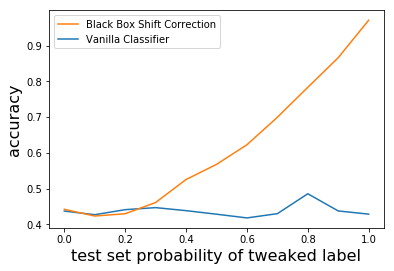

In [14]:
vanilla = plt.plot(np.arange(0,1.1, .1), label_p_unweighted.mean(axis=0), label='Vanilla Classifier' )
bbls = plt.plot(np.arange(0,1.1, .1), label_p_weighted.mean(axis=0), label='Black Box Shift Correction')
plt.xlabel("test set probability of tweaked label", fontsize=16)  
plt.ylabel("accuracy", fontsize=16)  

plt.legend(handles=[bbls[0], vanilla[0]])


plt.savefig("tweak-one.png", bbox_inches='tight')

'0.0_1'

dict_keys(['0.0_0', '0.1_0', '0.2_0', '0.3_0', '0.4_0', '0.5_0', '0.6_0', '0.7_0', '0.8_0', '0.9_0', '1.0_0'])

In [9]:
results_dict

{'0.0_0': {'acc_unweighted': 0.43916017,
  'acc_weighted': 0.44804686,
  'kl_div': array([ 0.11604097]),
  'wt': array([[ 0.02301248],
         [ 0.96411988],
         [ 0.98879571],
         [ 1.60483832],
         [ 0.96474763],
         [ 0.79200116],
         [ 1.07577561],
         [ 1.2117263 ],
         [ 1.31396545],
         [ 1.11535932]]),
  'wt_l2': 0.031094324702220295,
  'wt_true': array([[ 0.        ],
         [ 1.08663779],
         [ 1.11639344],
         [ 1.16832362],
         [ 1.09010194],
         [ 1.08387728],
         [ 1.07971262],
         [ 1.11431514],
         [ 1.19232065],
         [ 1.09734513]])},
 '0.1_0': {'acc_unweighted': 0.43486327,
  'acc_weighted': 0.40849608,
  'kl_div': array([ 0.01078519]),
  'wt': array([[ 1.03802689],
         [ 0.9891726 ],
         [ 0.71638991],
         [ 0.79985925],
         [ 1.00039581],
         [ 1.13426308],
         [ 1.15851719],
         [ 0.93049331],
         [ 1.18878273],
         [ 1.05450127]]),
  'wt_l